<a href="https://colab.research.google.com/github/debopriya0610/PlantDiseaseDetectionUsingML/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Dec  3 12:10:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 53kB/s 


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/Train'
valid_path = '/content/drive/MyDrive/dataset/Valid'


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/dataset/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
classes=len(folders)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(classes, activation='softmax')(x)


#MobileNetV2 base_model code
#base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
#x = base_model.output
#x = GlobalAveragePooling2D()(x)
#x = BatchNormalization()(x)
#x = Dense(1280, activation='relu',  kernel_initializer=glorot_uniform(seed), bias_initializer='zeros')(x)
#x = BatchNormalization()(x)
#predictions = Dense(classes, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros')(x)


#VGG19 model and layers code
#vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#x = Flatten()(vgg19.output)
#classes=len(folders)
#prediction = Dense(classes, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Valid',
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')


Found 15048 images belonging to 16 classes.
Found 3760 images belonging to 16 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
471/471 [==============================] - 9436s 20s/step - loss: 0.7658 - accuracy: 0.7568 - val_loss: 0.5099 - val_accuracy: 0.8362
Epoch 2/10
471/471 [==============================] - 203s 430ms/step - loss: 0.4380 - accuracy: 0.8575 - val_loss: 0.5822 - val_accuracy: 0.8282
Epoch 3/10
471/471 [==============================] - 202s 430ms/step - loss: 0.3445 - accuracy: 0.8855 - val_loss: 0.4398 - val_accuracy: 0.8638
Epoch 4/10
471/471 [==============================] - 203s 430ms/step - loss: 0.2851 - accuracy: 0.9018 - val_loss: 0.3396 - val_accuracy: 0.8944
Epoch 5/10
471/471 [==============================] - 202s 429ms/step - loss: 0.2635 - accuracy: 0.9149 - val_loss: 0.3599 - val_accuracy: 0.9003
Epoch 6/10
471/471 [==============================] - 203s 431ms/step - loss: 0.2409 - accuracy: 0.9216 - val_loss: 0.3944 - val_accuracy: 0.8888
Epoch 7/10
471/471 [=============================

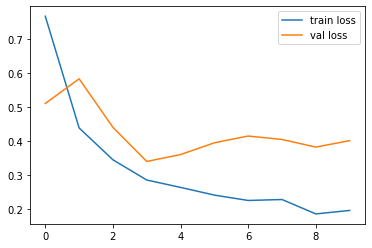

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

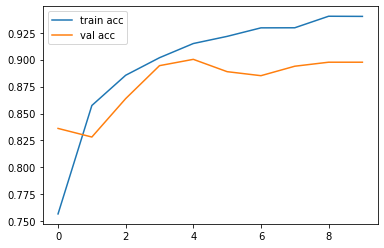

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
nb_validate_samples = 0
for r, dirs, files in os.walk(valid_path):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))

score = model.evaluate_generator(test_set, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.40065041184425354
Test Accuracy: 0.897606372833252


In [ ]:
import os
import sys
import cv2
import pandas as pd

num_images = len(glob.glob("/content/drive/MyDrive/plantdisease_test/*.JPG"))
predict_files = glob.glob("/content/drive/MyDrive/plantdisease_test/*.JPG")

im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (224, 224)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (224, 224)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("/")[-1]])
    
final = pd.DataFrame()
final["id"] = image_id
final["Plant_Disease"] = predictor



classes = training_set.class_indices
classes = {value : key for key, value in classes.items()}

final["Plant_Disease"] = final["Plant_Disease"].apply(lambda x: classes[x])
final.head(num_images)

,id,Plant_Disease
0,Corn_(maize)___Common_rust.JPG,Corn_(maize)___Common_rust
1,Corn_(maize)___Northern_Leaf_Blight_2.JPG,Corn_(maize)___Northern_Leaf_Blight
2,Corn_(maize)___Northern_Leaf_Blight.JPG,Corn_(maize)___Northern_Leaf_Blight
3,Corn_(maize)___healthy.JPG,Corn_(maize)___healthy
4,Potato___Early_blight.JPG,Potato___Early_blight
5,Potato___Late_blight.JPG,Potato___Late_blight
6,Potato___healthy.JPG,Potato___healthy
7,Potato___healthy_2.JPG,Potato___healthy
8,Tomato___Bacterial_spot_2.JPG,Tomato___Bacterial_spot
9,Tomato___Bacterial_spot.JPG,Tomato___Bacterial_spot
